In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random
from time import time
from copy import copy
import seaborn as sns
sns.set_theme()


In [2]:
[random.random() for i in range(10)]

[0.37194398967792675,
 0.7148073849707531,
 0.6829982924522603,
 0.17623215751582433,
 0.7297579899200911,
 0.28594804826905995,
 0.8892688122880648,
 0.1654583390730342,
 0.009008589626010255,
 0.9663101580867007]

In [3]:
random.seed(seed=1)

In [4]:
random.random()

0.417022004702574

In [5]:
random.random()

0.7203244934421581

In [6]:
random.seed(seed=1)
random.random()

0.417022004702574

In [7]:
random.random((3,2))

array([[7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01],
       [9.23385948e-02, 1.86260211e-01]])

# Exercice 1

In [8]:
def uniforme_continue(a,b):
    return a + (b-a)*random.random()

[uniforme_continue(0,3) for i in range(10)]

[1.0366821811291431,
 1.1903024226920098,
 1.6164502020100708,
 1.2575835432098845,
 2.0556585011902784,
 0.6133567491945523,
 2.6343523091728365,
 0.08216277959377849,
 2.011402530535207,
 1.2519144071013808]

In [9]:
def test_disque(N):
    #random() peut créer des arrays numpy
    alea = random.random((N,2))*2 - 1 
    
    # on calcule les listes de points dans le disque et hors du disque,
    # ainsi que l'évolution de la fréquence des points dans le disque
    f = []
    iplus = []
    iminus = []
    for i in range(N):
        if alea[i,0]**2 + alea[i,1]**2 <= 1:
            iplus.append(i)
        else:
            iminus.append(i)
        f.append(len(iplus)/(i+1)) 
    Zplus = (np.array([alea[i,0:2] for i in iplus]))
    Zminus = (np.array([alea[i,0:2] for i in iminus]))

    #on crée une figure avec deux sous-figures
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10)) 
    
    #on ajoute sur la première figure les points aléatoires en deux couleurs
    ax1.scatter(*Zplus.transpose(), color=sns.color_palette()[0])          
    ax1.scatter(*Zminus.transpose(), color=sns.color_palette()[1])

    #on ajoute sur la première figure le cercle unité
    circle = plt.Circle((0,0), 1, fill=False) 
    ax1.add_patch(circle)
    #ne pas oublier les légendes et le rapport x/y
    ax1.set_aspect(1)                         
    ax1.set_xlim(xmin=-1,xmax=1)
    ax1.set_ylim(ymin=-1,ymax=1)
    ax1.set_title("Nuage de points")     
    
    #on ajoute sur la seconde figure le graphe des fréquences et la fréquence limite
    ax2.plot(f)                              
    ax2.plot([0,N], [np.pi/4,np.pi/4], color="black")      
    #ne pas oublier les légendes et  le rapport x/y
    ax2.set_aspect(2*N)
    ax2.set_title("Proportion de points dans le disque")  

    #on espace un peu les figures et on les affiche
    plt.subplots_adjust(wspace = 0.5)         
    plt.show()

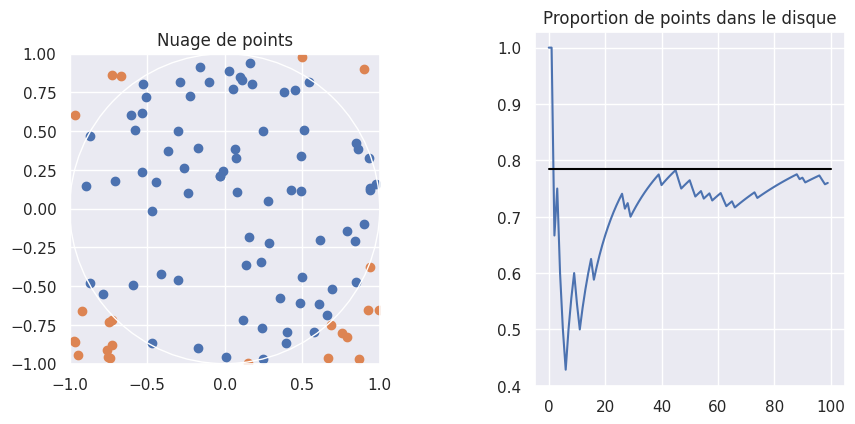

In [10]:
test_disque(100)

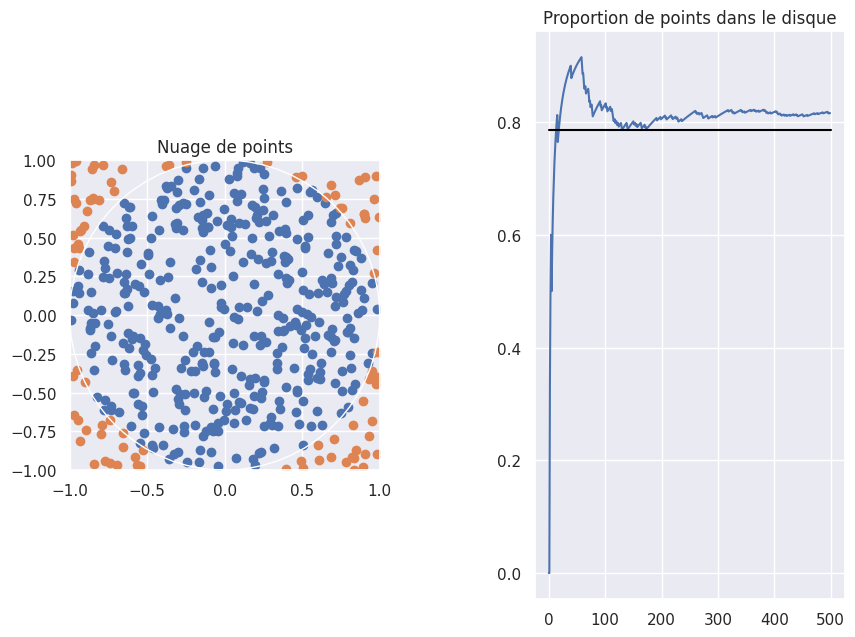

In [11]:
test_disque(500)

# Exercice 2

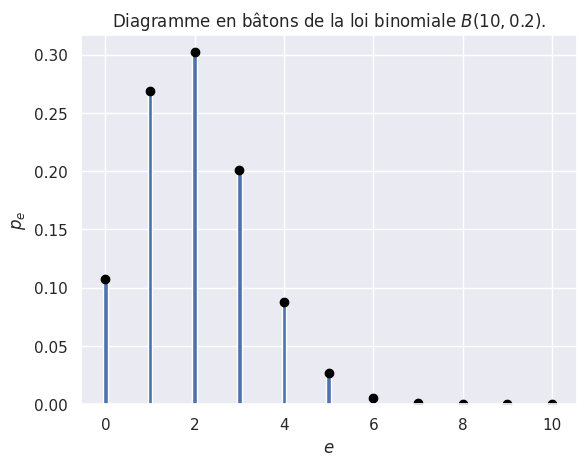

In [12]:
n = 10
p = 0.2
x = range(n+1)
y = [math.comb(n,i) * (1-p)**(n-i) * p**i for i in x]
width = 0.1
fig, ax = plt.subplots()
ax.bar(x, y, width, align="center")
ax.scatter(x, y, color="black")
ax.set_xlabel("$e$")
ax.set_ylabel("$p_e$")
ax.set_title(f"Diagramme en bâtons de la loi binomiale $B({n},{p})$.") 
plt.show()

In [13]:
def histogramme_geometrique(p, m=None): 
    # l'argument m est optionnel, on peut le calculer s'il n'est pas donné
    if m==None:
        m1 = math.ceil(math.log(0.05)/math.log(1-p))
    else:
        m1 = m
    
    # avec une seule figure, on pourrait se passer de la méthode subplots 
    # mais cela change un peu les commandes pour les légendes et titres 
    # pour être honnête : cette syntaxe est incompréhensible
    # par simplicité : toujours utiliser la définition avec subplots, même lorsqu'il y en a un seul
    fig, ax = plt.subplots(figsize=(10,5))         
    ax.bar(range(1,m1+1), [(1-p)**(i-1)*p for i in range(1, m1+1)], align="center")
    # ne pas oublier les légendes
    ax.set_xlabel("k")                          
    ax.set_ylabel("P[k]")
    ax.set_title(f"Histogramme de la loi géométrique de paramètre {p}")
    plt.show()

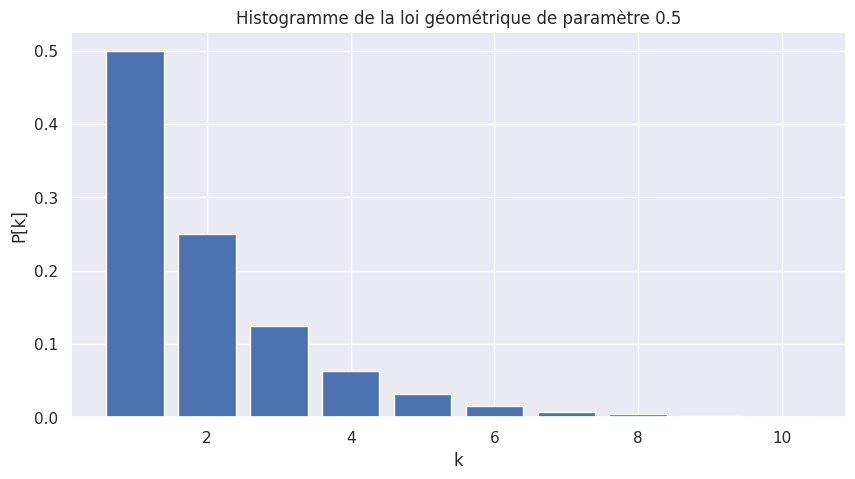

In [14]:
histogramme_geometrique(0.5, 10)

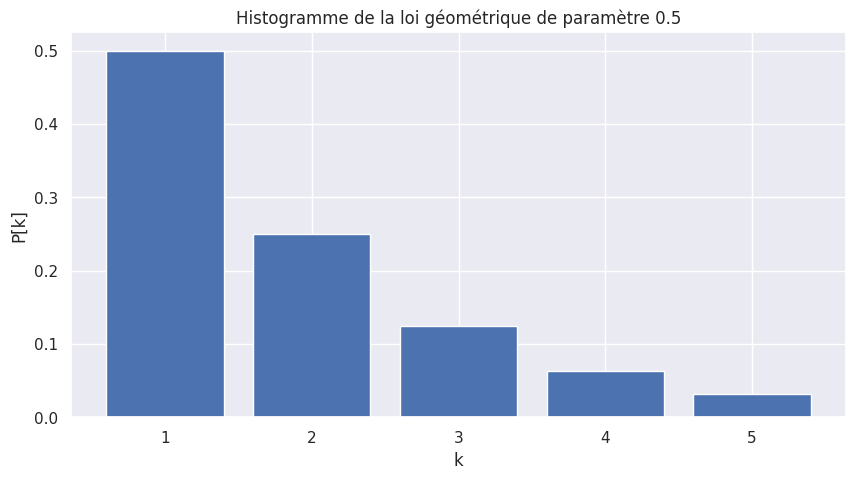

In [15]:
histogramme_geometrique(0.5)

# Exercice 3

On calcule :
\begin{align*}
P[Y\leq 1] &= \frac{1}{6^3} = \frac{1}{216} ;\\
P[Y \leq 2] &= \frac{1}{3^3} = \frac{1}{27} ; \\
P[Y \leq 3] &= \frac{1}{2^3} = \frac{1}{8} ; \\
P[Y \leq 4] &= \frac{2^3}{3^3} = \frac{8}{27} ; \\
P[Y \leq 5] & = \frac{5^3}{6^3} = \frac{125}{216}.
\end{align*}
Donc : 
\begin{align*}
P[Y=1] &= \frac{1}{216} ;\\ 
P[Y=2] &= \frac{1}{27} - \frac{1}{216}  = \frac{7}{216};\\ 
P[Y=3] &= \frac{1}{8} - \frac{1}{27}  = \frac{19}{216};\\ 
P[Y=4] &= \frac{8}{27} - \frac{1}{8}  = \frac{37}{216};\\ 
P[Y=5] &= \frac{125}{216} - \frac{8}{27} = \frac{61}{216} ;\\
P[Y=6] &= 1- \frac{125}{216} = \frac{91}{216}.
\end{align*}

In [17]:
def lancer_des(n):
    # on calcule 3*n lancers de dés indépendants
    alea = random.randint(low=1, high=7, size=(3,n)) 
    # on calcule les maxima par lots de 3 lancers
    aleamax = [alea[0:3,i].max() for i in range(n)]  
    # on compte les occurrences de 1,2,...,6 et on divise par n
    frequences = [aleamax.count(i)/n for i in range(1,7)] 
    frequences_theo = [1/216, 7/216, 19/216, 37/216, 61/216, 91/216] 
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(1,7), frequences, width=-0.2, color=sns.color_palette()[1], align="edge")
    ax.bar(range(1,7), frequences_theo, width=0.2, color=sns.color_palette()[0], align="edge")
    ax.set_xlabel("Résultat du maximum de trois lancers")
    ax.set_ylabel("Fréquences")
    ax.set_title("Histogramme : les fréquences empiriques en rouge et les fréquences théoriques en bleu")
    plt.show()

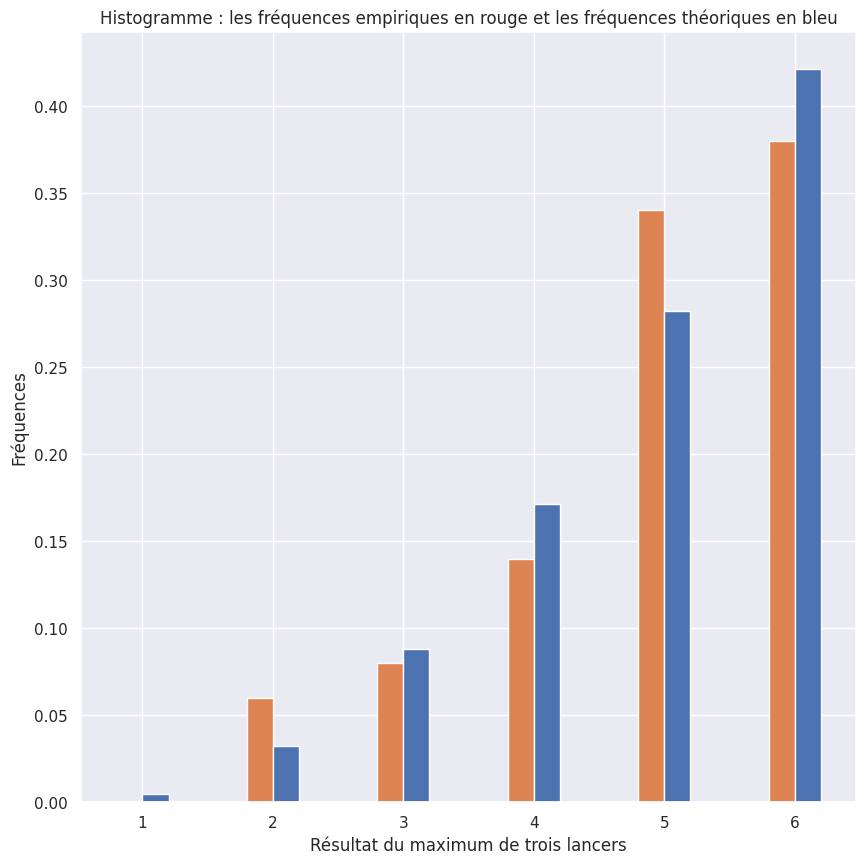

In [18]:
lancer_des(50)

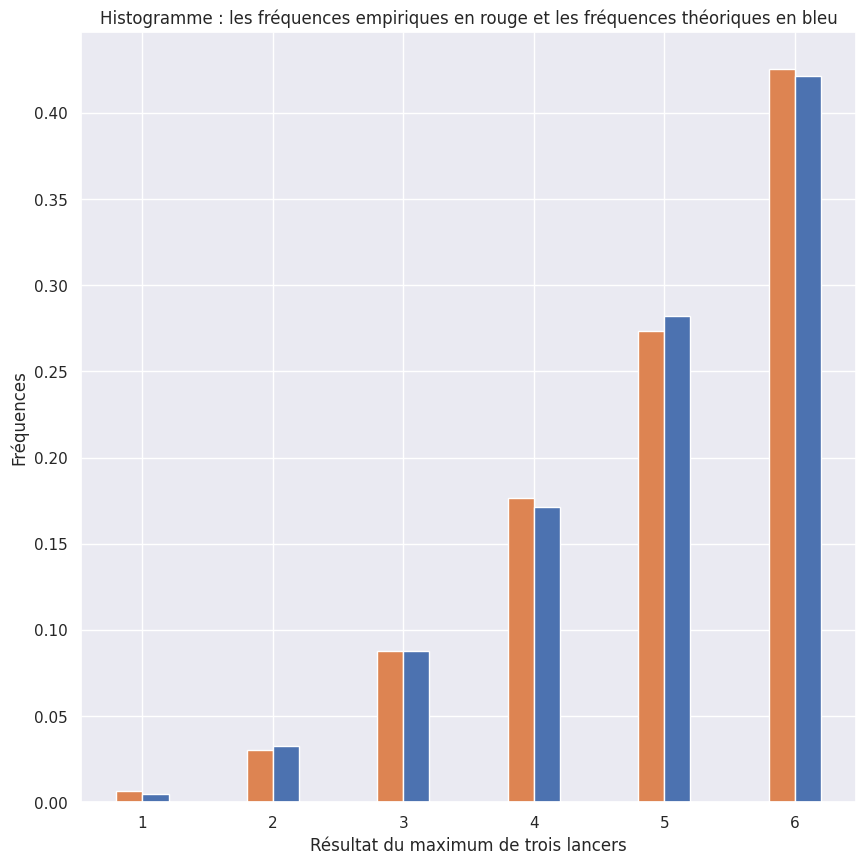

In [19]:
lancer_des(10000)

# Exercice 4

In [22]:
def geometrique1(p):
    alea = random.random()
    seuil = 0
    res = 0
    while seuil < alea:
        res += 1
        seuil += (1-p)**(res-1) * p
    return res

In [23]:
def geometrique2(p):
    count = 1
    while random.random()>p:
        count += 1
    return count

In [24]:
def geometrique3(p):
    return math.ceil(math.log(random.random())/math.log(1-p))

In [25]:
def geometrique4(p):
    return random.geometric(p)

In [26]:
N = 100000
p = 0.5
t11 = time()
[geometrique1(p) for i in range(N)]
t21 = time()
delta_t1 = t21-t11
print(f"La méthode 1 a pris {delta_t1} secondes sur {N} essais.")

t12 = time()
[geometrique2(p) for i in range(N)]
t22 = time()
delta_t2 = t22-t12
print(f"La méthode 2 a pris {delta_t2} secondes sur {N} essais.")

t13 = time()
[geometrique3(p) for i in range(N)]
t23 = time()
delta_t3 = t23-t13
print(f"La méthode 3 a pris {delta_t3} secondes sur {N} essais.")

t14 = time()
# [geometrique4(p) for i in range(N)]
random.geometric(p, N)
t24 = time()
delta_t4 = t24-t14
print(f"La méthode 4 a pris {delta_t4} secondes sur {N} essais.")

La méthode 1 a pris 0.056249141693115234 secondes sur 100000 essais.
La méthode 2 a pris 0.050533294677734375 secondes sur 100000 essais.
La méthode 3 a pris 0.04816937446594238 secondes sur 100000 essais.
La méthode 4 a pris 0.001714944839477539 secondes sur 100000 essais.


Les méthodes sont équivalentes pour un seul essai, mais la méthode random.geometric(p, N) qui renvoie directement un array numpy de taille N gagne très largement non pas grâce à l'algorithme de tirage à aléatoire, mais grâce à la façon de manipuler le vecteur de nombres.

In [35]:
def histogramme_geometrique_2(p, N):
    m = math.ceil(math.log(0.02)/math.log(1-p))
    alea = random.geometric(p, N)
    frequences = [np.count_nonzero(alea == i)/N for i in range(1, m+1)]
    frequences_theo = [(1-p)**(i-1) * p for i in range(1, m+1)]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(1, m+1), frequences, width=-0.2, color=sns.color_palette()[1], align="edge")
    ax.bar(range(1, m+1), frequences_theo, width=0.2, color=sns.color_palette()[0], align="edge")
    ax.set_xlabel(f"Variable aléatoire géométrique de paramètre p = {p}")
    ax.set_ylabel(f"Fréquences (avec {N} essais)")
    ax.set_title("Histogramme : les fréquences empiriques en rouge et les fréquences théoriques en bleu")
    plt.show()

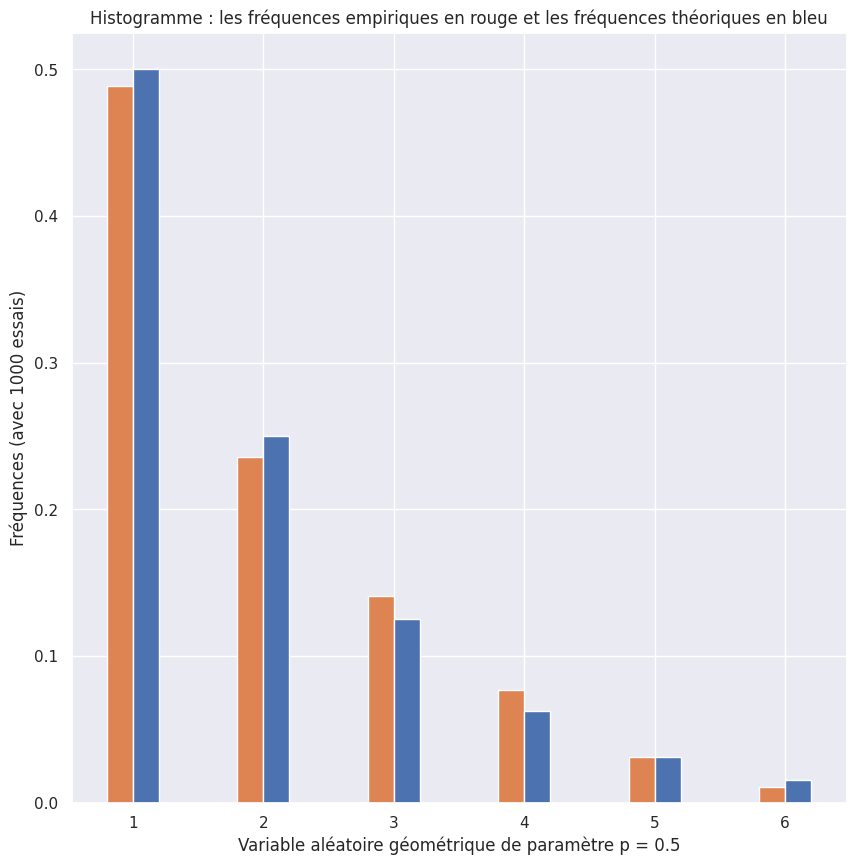

In [36]:
histogramme_geometrique_2(0.5, 1000)

# Exercice 5

In [37]:
def poisson1(mu):
    alea = random.random()
    seuil = 0
    res = -1
    while seuil < alea:
        res += 1
        seuil += math.exp(-mu) * mu**res / math.factorial(res)
    return res

In [38]:
def poisson2(mu):
    res = -1
    a = 1
    b = math.exp(-mu)
    while a>b:
        res += 1
        a *= random.random()
    return res

In [39]:
def poisson3(mu):
    return random.poisson(mu)

In [40]:
N = 10000
mu = 1
t11 = time()
[poisson1(mu) for i in range(N)]
t21 = time()
delta_t1 = t21-t11
print(f"La méthode 1 a pris {delta_t1} secondes sur {N} essais.")

t12 = time()
[poisson2(mu) for i in range(N)]
t22 = time()
delta_t2 = t22-t12
print(f"La méthode 2 a pris {delta_t2} secondes sur {N} essais.")

t13 = time()
# [poisson3(mu) for i in range(N)]
random.poisson(mu, size=N)
t23 = time()
delta_t3 = t23-t13
print(f"La méthode 3 a pris {delta_t3} secondes sur {N} essais.")

La méthode 1 a pris 0.013869524002075195 secondes sur 10000 essais.
La méthode 2 a pris 0.009035587310791016 secondes sur 10000 essais.
La méthode 3 a pris 0.0003662109375 secondes sur 10000 essais.


In [43]:
def histogramme_poisson(mu, M, N):
    alea = random.poisson(mu, size=N)
    frequences = [np.count_nonzero(alea == i)/N for i in range(M+1)]
    frequences_theo = [math.exp(-mu) * (mu**i)/math.factorial(i) for i in range(M+1)]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(M+1), frequences, width=-0.2, color=sns.color_palette()[1], align="edge")
    ax.bar(range(M+1), frequences_theo, width=0.2, color=sns.color_palette()[0], align="edge")
    ax.set_xlabel(f"Variable aléatoire de Poisson de paramètre mu = {mu}")
    ax.set_ylabel(f"Fréquences (avec {N} essais)")
    ax.set_title("Histogramme : les fréquences empiriques en rouge et les fréquences théoriques en bleu")
    plt.show()

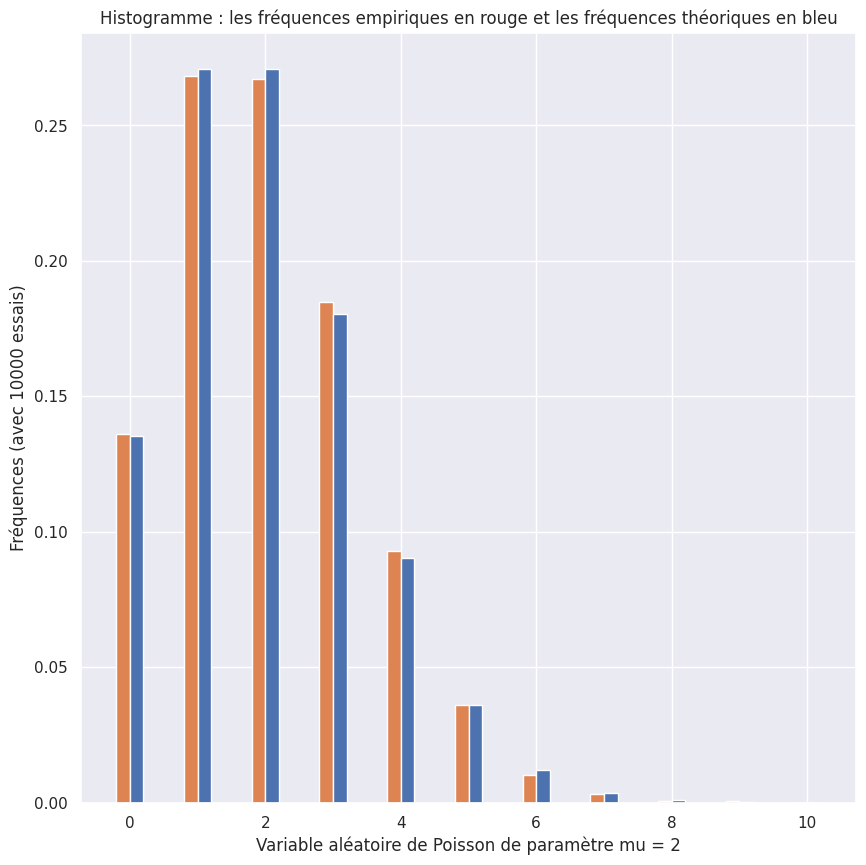

In [44]:
histogramme_poisson(2, 10, 10000)

In [45]:
def convolution_poisson(l, m, M=10, N=10000):
    alea = random.poisson(l, size=N) + random.poisson(m, size=N)
    frequences = [np.count_nonzero(alea == i)/N for i in range(M+1)]
    frequences_theo = [math.exp(-l-m) * ((l+m)**i)/math.factorial(i) for i in range(M+1)]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(M+1), frequences, width=-0.2, color=sns.color_palette()[1], align="edge")
    ax.bar(range(M+1), frequences_theo, width=0.2, color=sns.color_palette()[0], align="edge")
    ax.set_xlabel(f"Somme de variables aléatoires de Poisson indépendantes de paramètres {l} et {m}")
    ax.set_ylabel(f"Fréquences (avec {N} essais)")
    ax.set_title("Histogramme : les fréquences empiriques en rouge et les fréquences théoriques en bleu")
    plt.show()

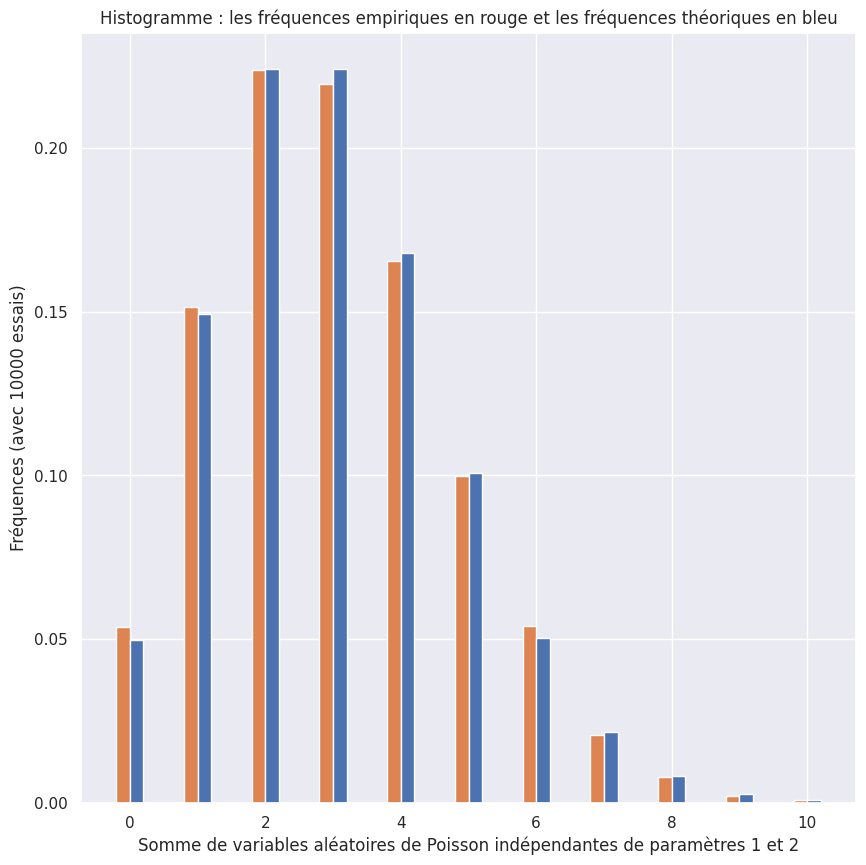

In [46]:
convolution_poisson(1, 2)

In [47]:
def decimation(l, p, M=10, N=10000):
    Xalea = random.poisson(l, size=N)
    Yalea = random.binomial(Xalea, p)
    frequences = [np.count_nonzero(Yalea == i)/N for i in range(M+1)]
    frequences_theo = [math.exp(-p*l) * ((p*l)**i)/math.factorial(i) for i in range(M+1)]
    fig, ax = plt.subplots(figsize=(10,10))
    ax.bar(range(M+1), frequences, width=-0.2, color=sns.color_palette()[1], align="edge")
    ax.bar(range(M+1), frequences_theo, width=0.2, color=sns.color_palette()[0], align="edge")
    ax.set_xlabel(f"Décimation de paramètre {p} de variables aléatoires de Poisson de paramètres {l}")
    ax.set_ylabel(f"Fréquences (avec {N} essais)")
    ax.set_title("Histogramme : les fréquences empiriques en rouge et les fréquences théoriques en bleu")
    plt.show()

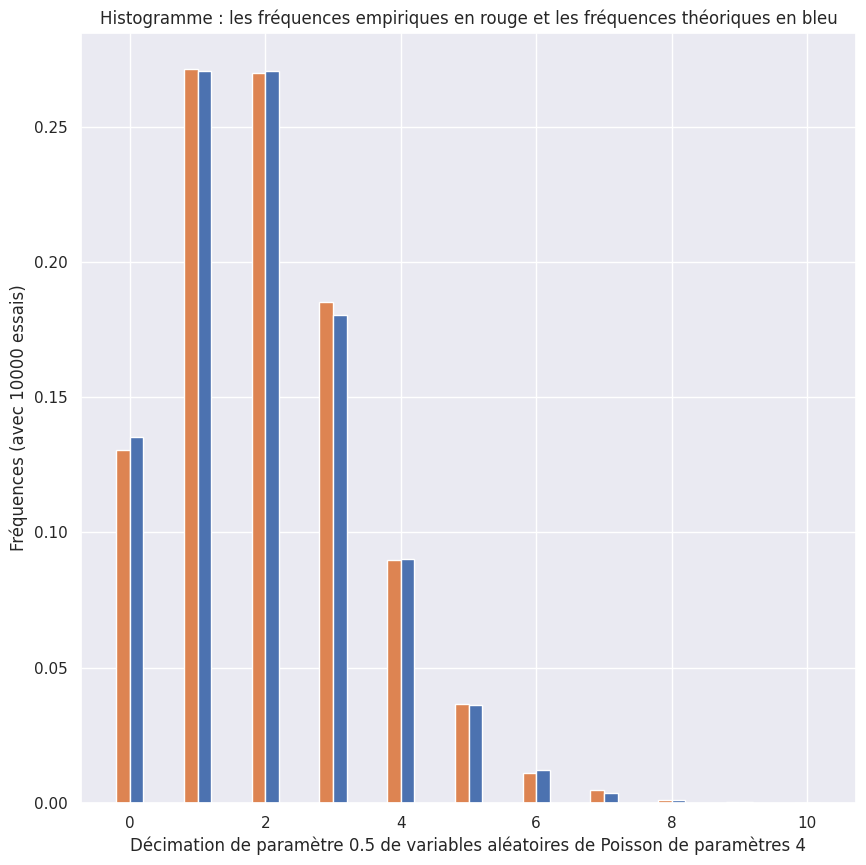

In [48]:
decimation(4,0.5)